### well structured - an ode to databases


In [14]:
import sqlite3
import pandas as pd
import numpy as np

# 1. evaluation migration

## immigration

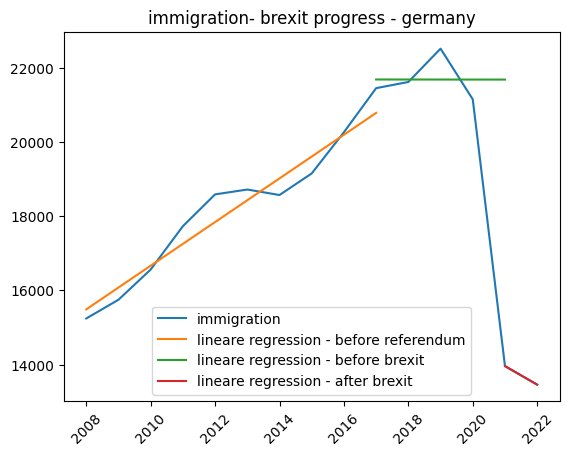

In [15]:
conn = sqlite3.connect('brexit.db')

sql = "SELECT year FROM migration WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
year = result['year'].tolist()

sql = "SELECT immigration FROM migration WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
immigration = result['immigration'].tolist()

sql = """
SELECT (lin_reg_migration.b_year_immigration * migration.year + lin_reg_migration.a_year_immigration) as calc_immi_1
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 1"""

result = pd.read_sql(sql,conn)
calc_immi_1_1 = result['calc_immi_1'].tolist()

result = pd.read_sql(sql,conn)
result[10:] = 0
calc_immi_1 = result['calc_immi_1'].tolist()
calc_immi_1 = [np.NaN if x==0 else x for x in calc_immi_1]

sql = """
SELECT (lin_reg_migration.b_year_immigration * migration.year + lin_reg_migration.a_year_immigration) as calc_immi_2
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 2"""

result = pd.read_sql(sql,conn)
result[:9] = 0
result[14:] = 0
calc_immi_2 = result['calc_immi_2'].tolist()
calc_immi_2 = [np.NaN if x==0 else x for x in calc_immi_2]

sql = """
SELECT (lin_reg_migration.b_year_immigration * migration.year + lin_reg_migration.a_year_immigration) as calc_immi_3
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 3"""

result = pd.read_sql(sql,conn)
result[0:13] = 0
calc_immi_3 = result['calc_immi_3'].tolist()
calc_immi_3 = [np.NaN if x==0 else x for x in calc_immi_3]

sql = "SELECT description FROM brexit_progress"
result = pd.read_sql(sql,conn)
description = result['description'].tolist()

df = pd.DataFrame({'immigration': immigration, "lineare regression - " + description[0]: calc_immi_1, 'lineare regression - ' + description[1]: calc_immi_2,  'lineare regression - ' + description[2]: calc_immi_3}, index=year)
plot = df.plot.line(title="immigration- brexit progress - germany", rot=45)

conn.commit()
conn.close()

<font color='#5891db'>Immigration from the UK to Germany increases significantly before the referendum. From the decision to implement Brexit until Brexit is completed, immigration numbers remain relatively constant. Immigration numbers are falling after Brexit. </font>

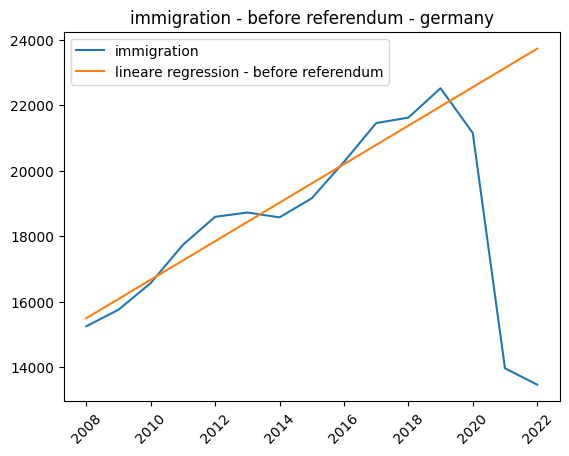

In [16]:
df = pd.DataFrame({'immigration': immigration, "lineare regression - " + description[0]: calc_immi_1_1}, index=year)
plot = df.plot.line(title="immigration - " + description[0] + " - germany", rot=45)

<font color='#5891db'> Using linear regression, it is now possible to predict what the immigration numbers would have been had the referendum and Brexit not taken place. In 2022, around 24,000 people would have immigrated to Germany instead of around 13,000 people.</br> </br>It can be seen that the actual values ​​differ little from the linear regression line.</font>

# emigration

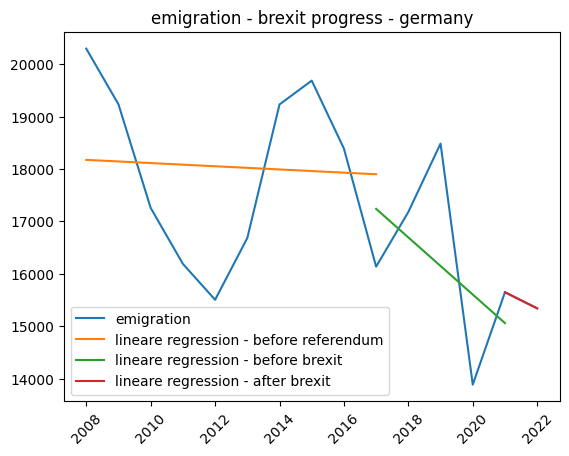

In [17]:
conn = sqlite3.connect('brexit.db')

sql = "SELECT year FROM migration WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
year = result['year'].tolist()

sql = "SELECT emigration FROM migration WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
emigration = result['emigration'].tolist()

sql = """
SELECT (lin_reg_migration.b_year_emigration * migration.year + lin_reg_migration.a_year_emigration) as calc_immi_1
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 1"""

result = pd.read_sql(sql,conn)
calc_immi_1_1 = result['calc_immi_1'].tolist()

result = pd.read_sql(sql,conn)
result[10:] = 0
calc_immi_1 = result['calc_immi_1'].tolist()
calc_immi_1 = [np.NaN if x==0 else x for x in calc_immi_1]

sql = """
SELECT (lin_reg_migration.b_year_emigration * migration.year + lin_reg_migration.a_year_emigration) as calc_immi_2
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 2"""

result = pd.read_sql(sql,conn)
result[:9] = 0
result[14:] = 0
calc_immi_2 = result['calc_immi_2'].tolist()
calc_immi_2 = [np.NaN if x==0 else x for x in calc_immi_2]

sql = """
SELECT (lin_reg_migration.b_year_emigration * migration.year + lin_reg_migration.a_year_emigration) as calc_immi_3
FROM migration 
INNER JOIN lin_reg_migration
WHERE migration.year > 2007 
AND lin_reg_migration.f_id_brexit_progress = 3"""

result = pd.read_sql(sql,conn)
result[0:13] = 0
calc_immi_3 = result['calc_immi_3'].tolist()
calc_immi_3 = [np.NaN if x==0 else x for x in calc_immi_3]

sql = "SELECT description FROM brexit_progress"
result = pd.read_sql(sql,conn)
description = result['description'].tolist()

df = pd.DataFrame({'emigration': emigration, "lineare regression - " + description[0]: calc_immi_1, 'lineare regression - ' + description[1]: calc_immi_2, 'lineare regression - ' + description[2]: calc_immi_3}, index=year)
plot = df.plot(title="emigration - brexit progress - germany", rot=45)

conn.commit()
conn.close()

<font color='#5891db'>Emigration from Germany to the United Kingdom fell slightly before the referendum. From the decision to implement Brexit until Brexit is completed, the number of emigration falls relatively sharply. After Brexit, however, emigration numbers continue to fall somewhat less sharply. </font>

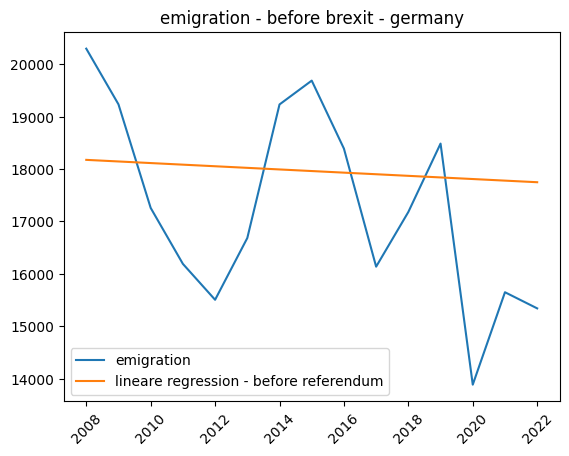

In [18]:
df = pd.DataFrame({'emigration': emigration, 'lineare regression - ' + description[0]: calc_immi_1_1}, index=year)
plot = df.plot(title="emigration - " + description[1] + " - germany", rot=45)

<font color='#5891db'> Using linear regression, it is now possible to predict what the emigration numbers would have been had the referendum and Brexit not taken place. In 2022, around 18,000 people would have emigrated to the United Kingdom instead of around 17,000 people.</br> </br>It can be seen that the actual values ​​deviate more from the linear regression line.</font>

# 2. evaluation economic growth

## germany

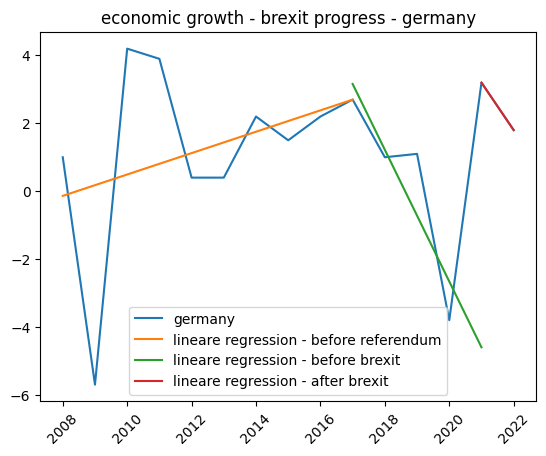

In [19]:
conn = sqlite3.connect('brexit.db')

sql = "SELECT year FROM economic_growth WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
year = result['year'].tolist()

sql = "SELECT germany FROM economic_growth WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
germany = result['germany'].tolist()

sql = """
SELECT (lin_reg_economic_growth.b_year_germany * economic_growth.year + lin_reg_economic_growth.a_year_germany) as calc_immi_1
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 1"""

result = pd.read_sql(sql,conn)
calc_immi_1_1 = result['calc_immi_1'].tolist()

result = pd.read_sql(sql,conn)
result[10:] = 0
calc_immi_1 = result['calc_immi_1'].tolist()
calc_immi_1 = [np.NaN if x==0 else x for x in calc_immi_1]

sql = """
SELECT (lin_reg_economic_growth.b_year_germany * economic_growth.year + lin_reg_economic_growth.a_year_germany) as calc_immi_2
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 2"""

result = pd.read_sql(sql,conn)
result[:9] = 0
result[14:] = 0
calc_immi_2 = result['calc_immi_2'].tolist()
calc_immi_2 = [np.NaN if x==0 else x for x in calc_immi_2]

sql = """
SELECT (lin_reg_economic_growth.b_year_germany * economic_growth.year + lin_reg_economic_growth.a_year_germany) as calc_immi_3
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 3"""

result = pd.read_sql(sql,conn)
result[0:13] = 0
calc_immi_3 = result['calc_immi_3'].tolist()
calc_immi_3 = [np.NaN if x==0 else x for x in calc_immi_3]

df = pd.DataFrame({'germany': germany, "lineare regression - " + description[0]: calc_immi_1, 'lineare regression - ' + description[1]: calc_immi_2,'lineare regression - ' + description[2]: calc_immi_3}, index=year)
plot = df.plot(title="economic growth - brexit progress - germany", rot=45)

conn.commit()
conn.close()

<font color='#5891db'>The economy of Germany is rising before the referendum. From the decision to implement Brexit until Brexit is completed, economic growth falls relatively sharply. After Brexit, economic growth rises and then falls again</font>

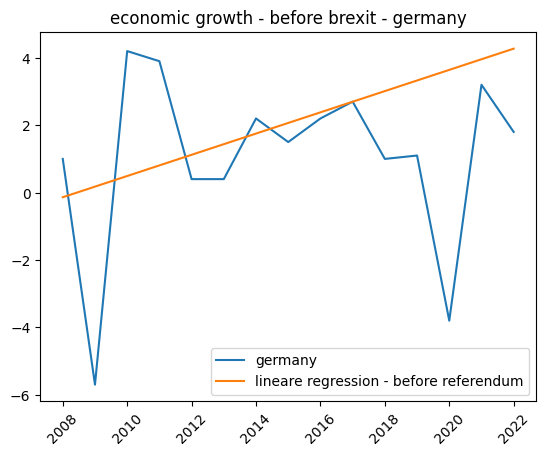

In [20]:
df = pd.DataFrame({'germany': germany, 'lineare regression - ' + description[0]: calc_immi_1_1}, index=year)
plot = df.plot(title="economic growth - " + description[1] + " - germany", rot=45)

<font color='#5891db'> Using linear regression, it is now possible to predict what economic growth would have been had the referendum and Brexit not taken place. In 2022, economic growth would have been around 4 instead of 2.</br> </br>It can be seen that the actual values ​​deviate more from the linear regression line.</font>

# united kingdom

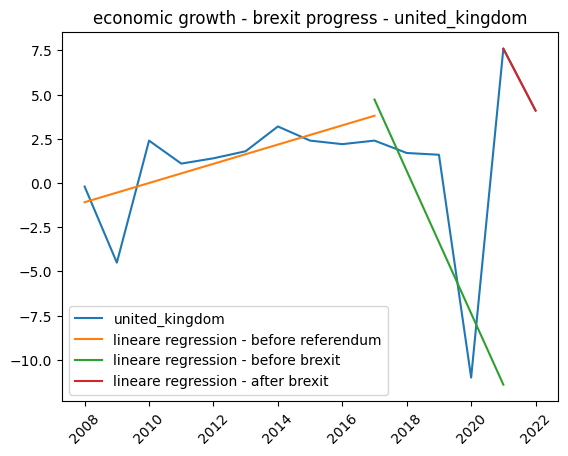

In [21]:
conn = sqlite3.connect('brexit.db')

sql = "SELECT year FROM economic_growth WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
year = result['year'].tolist()

sql = "SELECT united_kingdom FROM economic_growth WHERE f_id_brexit_progress > 0"
result = pd.read_sql(sql,conn)
united_kingdom = result['united_kingdom'].tolist()

sql = """
SELECT (lin_reg_economic_growth.b_year_united_kingdom * economic_growth.year + lin_reg_economic_growth.a_year_united_kingdom) as calc_immi_1
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 1"""

result = pd.read_sql(sql,conn)
calc_immi_1_1 = result['calc_immi_1'].tolist()

result = pd.read_sql(sql,conn)
result[10:] = 0
calc_immi_1 = result['calc_immi_1'].tolist()
calc_immi_1 = [np.NaN if x==0 else x for x in calc_immi_1]

sql = """
SELECT (lin_reg_economic_growth.b_year_united_kingdom * economic_growth.year + lin_reg_economic_growth.a_year_united_kingdom) as calc_immi_2
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 2"""

result = pd.read_sql(sql,conn)
result[:9] = 0
result[14:] = 0
calc_immi_2 = result['calc_immi_2'].tolist()
calc_immi_2 = [np.NaN if x==0 else x for x in calc_immi_2]

sql = """
SELECT (lin_reg_economic_growth.b_year_united_kingdom * economic_growth.year + lin_reg_economic_growth.a_year_united_kingdom) as calc_immi_3
FROM economic_growth 
INNER JOIN lin_reg_economic_growth
WHERE economic_growth.year > 2007 
AND lin_reg_economic_growth.f_id_brexit_progress = 3"""

result = pd.read_sql(sql,conn)
result[0:13] = 0
calc_immi_3 = result['calc_immi_3'].tolist()
calc_immi_3 = [np.NaN if x==0 else x for x in calc_immi_3]

df = pd.DataFrame({'united_kingdom': united_kingdom, "lineare regression - " + description[0]: calc_immi_1, 'lineare regression - ' + description[1]: calc_immi_2, 'lineare regression - ' + description[2]: calc_immi_3}, index=year)
plot = df.plot(title="economic growth - brexit progress - united_kingdom", rot=45)

conn.commit()
conn.close()

<font color='#5891db'>The economy of Germany is rising before the referendum. From the decision to implement Brexit until Brexit is completed, economic growth falls relatively sharply. After Brexit, economic growth rises and then falls again.</font>

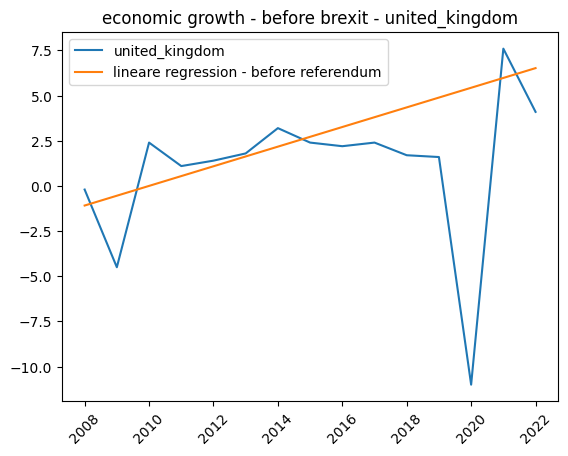

In [22]:
df = pd.DataFrame({'united_kingdom': united_kingdom, 'lineare regression - ' + description[0]: calc_immi_1_1}, index=year)
plot = df.plot(title="economic growth - " + description[1] + " - united_kingdom", rot=45)

<font color='#5891db'> Using linear regression, it is now possible to predict what economic growth would have been had the referendum and Brexit not taken place. In 2022, economic growth would have been around 7 instead of around 3.</br> </br>It can be seen that the actual values ​​deviate more from the linear regression line.</font>

## <font color='#bd1c3f'>This is a simple look at the brexit issue. Many factors such as the corona crisis were not taken into account. A multiple regression analysis could reveal more details here. The values ​​were also sometimes evaluated visually on the graphs. The analysis was carried out to the best of our knowledge and belief, but please understand that we cannot assume any responsibility for the accuracy of the results listed here.</font> 

